In [1]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
# import geemap 
# import ee

In [2]:
seoul=gpd.read_file('seoul_hex_all.geojson')

<Axes: >

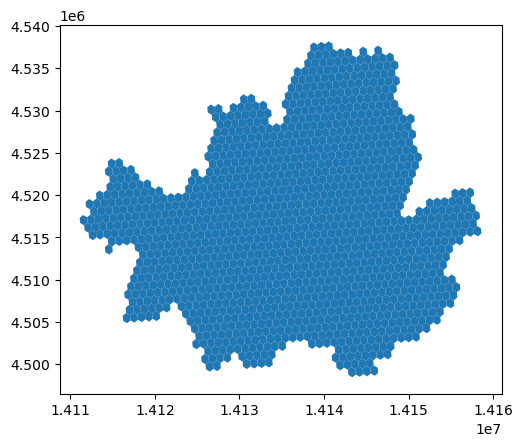

In [3]:
seoul.plot()

In [4]:
seoul.head()

,FID,GRID_ID,Shape_Leng,Shape_Area,trees_coun,trees_sum,built_coun,built_sum,temp_count,temp_mean,_count,_sum,_mean,_median,geometry
0,232,8830e03449fffff,3361.407091,804586.242810,9347,7181,9347,2078,895,9.017907,709.0,11666.003135,16.454165,16.524582,"MULTIPOLYGON (((14127798.660 4499517.236, 1412..."
1,236,8830e03453fffff,3362.900206,805335.131760,9359,9056,9359,49,894,6.485890,712.0,17057.404182,23.957028,23.693108,"MULTIPOLYGON (((14131304.340 4499762.752, 1413..."
2,240,8830e0345bfffff,3363.026197,805391.635449,9356,9336,9356,0,895,6.310021,711.0,16094.206440,22.636015,22.725664,"MULTIPOLYGON (((14130779.642 4500644.740, 1413..."
3,281,8830e034c9fffff,3364.019904,805896.916625,9366,9181,9366,33,896,6.529118,711.0,19472.457610,27.387423,28.175377,"MULTIPOLYGON (((14133935.062 4499946.218, 1413..."
4,340,8830e03601fffff,3362.283168,804998.810986,9353,557,9353,8334,895,10.898788,710.0,5160.200175,7.267888,4.663332,"MULTIPOLYGON (((14126575.718 4503105.261, 1412..."


In [5]:
seoul.rename(columns={'trees_coun':'trees_count','built_coun':'built_count','_count':'alt_count','_sum':'alt_sum', '_mean':'alt_mean', '_median':'alt_median'}, inplace=True)

In [6]:
seoul.head()

,FID,GRID_ID,Shape_Leng,Shape_Area,trees_count,trees_sum,built_count,built_sum,temp_count,temp_mean,alt_count,alt_sum,alt_mean,alt_median,geometry
0,232,8830e03449fffff,3361.407091,804586.242810,9347,7181,9347,2078,895,9.017907,709.0,11666.003135,16.454165,16.524582,"MULTIPOLYGON (((14127798.660 4499517.236, 1412..."
1,236,8830e03453fffff,3362.900206,805335.131760,9359,9056,9359,49,894,6.485890,712.0,17057.404182,23.957028,23.693108,"MULTIPOLYGON (((14131304.340 4499762.752, 1413..."
2,240,8830e0345bfffff,3363.026197,805391.635449,9356,9336,9356,0,895,6.310021,711.0,16094.206440,22.636015,22.725664,"MULTIPOLYGON (((14130779.642 4500644.740, 1413..."
3,281,8830e034c9fffff,3364.019904,805896.916625,9366,9181,9366,33,896,6.529118,711.0,19472.457610,27.387423,28.175377,"MULTIPOLYGON (((14133935.062 4499946.218, 1413..."
4,340,8830e03601fffff,3362.283168,804998.810986,9353,557,9353,8334,895,10.898788,710.0,5160.200175,7.267888,4.663332,"MULTIPOLYGON (((14126575.718 4503105.261, 1412..."


<Axes: >

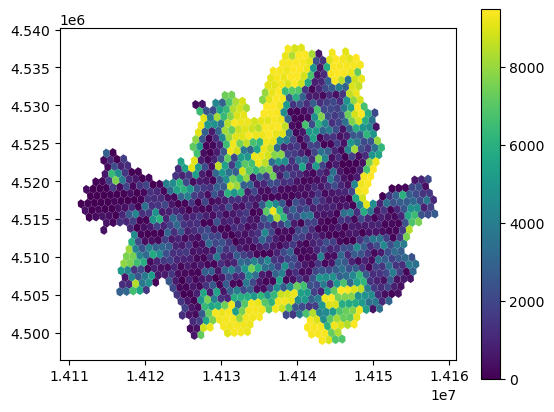

In [7]:
seoul.plot(column='trees_sum', legend=True)

<Axes: >

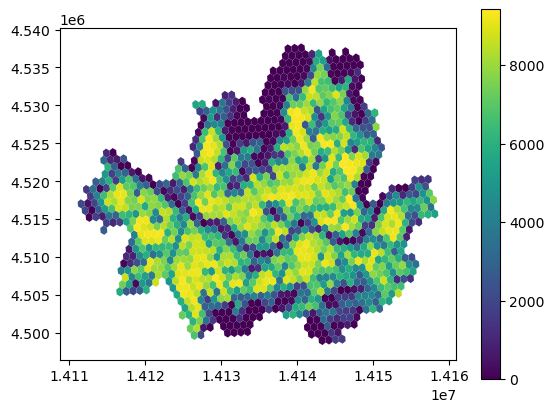

In [8]:
seoul.plot(column='built_sum', legend=True)

<Axes: >

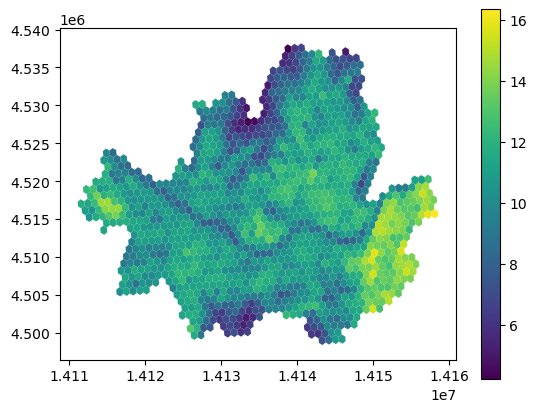

In [9]:
seoul.plot(column='temp_mean', legend=True)

<Axes: >

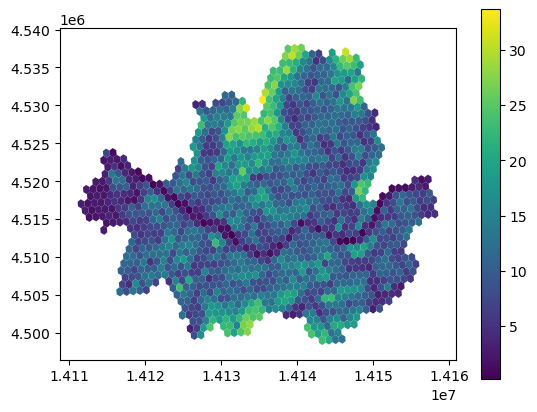

In [10]:
seoul.plot(column='alt_mean', legend=True)

In [11]:
seoul.to_file('hex_seoul.geojson', driver='GeoJSON')

# 1. Open Street Map Data

In [16]:
place_name = "Seoul, South Korea"
streets_graph = ox.graph_from_place(place_name, network_type='all')
streets_gdf = ox.graph_to_gdfs(streets_graph, nodes=False)


In [17]:
streets_gdf.head()

osmid    name      highway oneway reversed  \
u         v          key                                                   
266813237 3771909762 0    373776969  보광로12길  residential  False    False   
          436847094  0    373776969  보광로12길  residential  False     True   
          3771899749 0    373776966  보광로14길  residential  False    False   
278159482 1378780898 0     25524218   보광로7길  residential  False    False   
          1378780857 0     97836950     장문로     tertiary  False    False   

                          length  \
u         v          key           
266813237 3771909762 0    27.605   
          436847094  0    20.002   
          3771899749 0    69.877   
278159482 1378780898 0    66.892   
          1378780857 0    22.683   

                                                                   geometry  \
u         v          key                                                      
266813237 3771909762 0    LINESTRING (127.00079 37.52662, 127.00109 37.5...   
          436847094  0    LINESTRING (127.00079 37.52662, 127.00062 37.5...   
          3771899749 0    LINESTRING (127.00079 37.52662, 127.00059 37.5...   
278159482 1378780898 0    LINESTRING (126.99742 37.52596, 126.99813 37.5...   
          1378780857 0    LINESTRING (126.99742 37.52596, 126.99717 37.5...   

                         lanes width bridge tunnel  ref maxspeed junction  \
u         v          key                                                    
266813237 3771909762 0     NaN   NaN    NaN    NaN  NaN      NaN      NaN   
          436847094  0     NaN   NaN    NaN    NaN  NaN      NaN      NaN   
          3771899749 0     NaN   NaN    NaN    NaN  NaN      NaN      NaN   
278159482 1378780898 0     NaN   NaN    NaN    NaN  NaN      NaN      NaN   
          1378780857 0     NaN   NaN    NaN    NaN  NaN      NaN      NaN   

                         service access area  
u         v          key                      
266813237 3771909762 0       NaN    NaN  NaN  
          436847094  0       NaN    NaN  NaN  
          3771899749 0       NaN    NaN  NaN  
278159482 1378780898 0       NaN    NaN  NaN  
          1378780857 0       NaN    NaN  NaN

In [19]:
# List key-value pairs for tags
tags = {'building': True}   

buildings = ox.geometries_from_place(place_name, tags)
buildings.head()

/var/folders/ls/4rhr7kfj5nd_v0fn499s11hm0000gn/T/ipykernel_1581/2857596332.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  buildings = ox.geometries_from_place(place_name, tags)


entrance                    geometry  bus  \
element_type osmid                                                 
node         368652537      NaN  POINT (127.03318 37.49547)  NaN   
             368654784      NaN  POINT (127.05830 37.64034)  NaN   
             368869997      NaN  POINT (127.14854 37.53825)  NaN   
             368871729      NaN  POINT (127.00846 37.49105)  NaN   
             414685033      NaN  POINT (126.99511 37.53057)  NaN   

                       departures_board highway         name  \
element_type osmid                                             
node         368652537              NaN     NaN        역삼도서관   
             368654784              NaN     NaN     노원자원회수시설   
             368869997              NaN     NaN  길동 삼익세라믹아파트   
             368871729              NaN     NaN     서울법의학연구소   
             414685033              NaN     NaN      보광청화아파트   

                                                   name:en   name:ko  \
element_type osmid                                                     
node         368652537                     Yeoksam Library     역삼도서관   
             368654784            Nowon Incineration plant  노원자원회수시설   
             368869997                  Samikceramic A.P.T       NaN   
             368871729  Seoul Beopuihak Research Institute  서울법의학연구소   
             414685033               Bogwangcheonghwa Apt.   보광청화아파트   

                                    name:ko-Latn public_transport  ...  \
element_type osmid                                                 ...   
node         368652537          Yeoksamdoseogwan              NaN  ...   
             368654784       Sanggye 7 Dongmungo              NaN  ...   
             368869997                       NaN              NaN  ...   
             368871729  Seoul Beopuihak Yeonguso              NaN  ...   
             414685033    Bogwangcheonghwaapateu              NaN  ...   

                       building:parts alt_name:ru abbr_name  \
element_type osmid                                            
node         368652537            NaN         NaN       NaN   
             368654784            NaN         NaN       NaN   
             368869997            NaN         NaN       NaN   
             368871729            NaN         NaN       NaN   
             414685033            NaN         NaN       NaN   

                       building:facade:colour ruins not:name was:website  \
element_type osmid                                                         
node         368652537                    NaN   NaN      NaN         NaN   
             368654784                    NaN   NaN      NaN         NaN   
             368869997                    NaN   NaN      NaN         NaN   
             368871729                    NaN   NaN      NaN         NaN   
             414685033                    NaN   NaN      NaN         NaN   

                       wikimedia_commons playground:theme architect:en  
element_type osmid                                                      
node         368652537               NaN              NaN          NaN  
             368654784               NaN              NaN          NaN  
             368869997               NaN              NaN          NaN  
             368871729               NaN              NaN          NaN  
             414685033               NaN              NaN          NaN  

[5 rows x 430 columns]

(<Figure size 800x800 with 1 Axes>, <Axes: >)

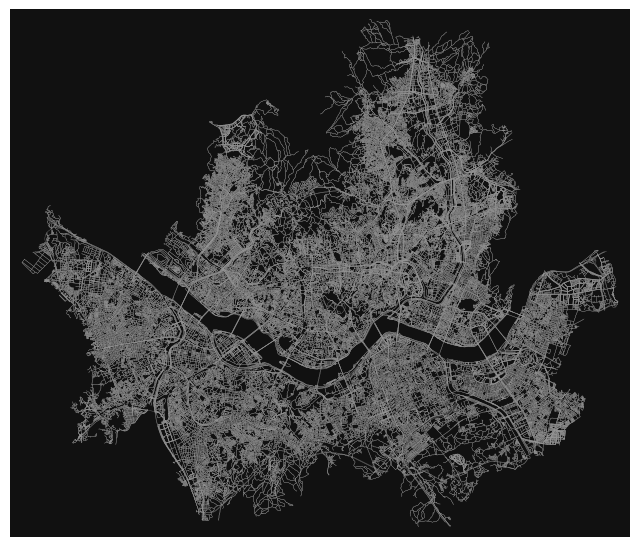

In [25]:
ox.plot_graph(streets_graph, node_size=0, edge_linewidth=0.2, show=False, close=False)

(<Figure size 800x800 with 1 Axes>, <Axes: >)

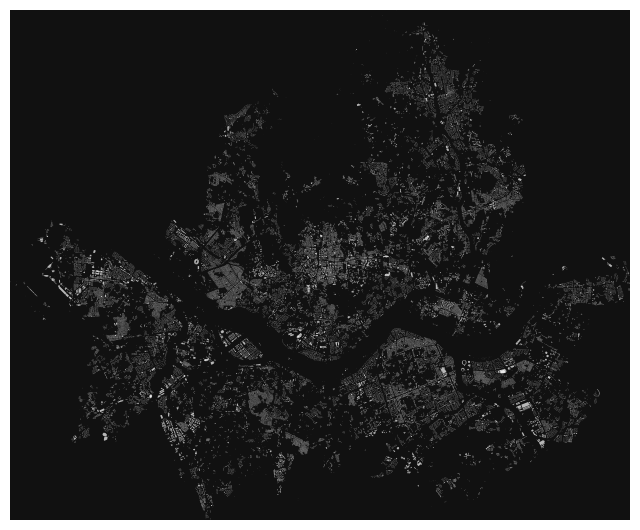

In [24]:
ox.plot_footprints(buildings, color='w', alpha=0.7, show=False, close=False)

# 2. DEM raster data

In [1]:
import geemap
import ee

In [5]:
ee.Authenticate()


Successfully saved authorization token.


In [29]:
ee.Initialize()

In [30]:
Map=geemap.Map(center=[37.5665, 126.9780], zoom=12)

In [31]:
Map

Map(center=[37.5665, 126.978], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDa…

In [32]:
image=ee.ImageCollection('JAXA/ALOS/AW3D30/V3_2').select('DSM').first()

In [33]:
image.getInfo()

{'type': 'Image',
 'bands': [{'id': 'DSM',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': -32768,
    'max': 32767},
   'dimensions': [3600, 3600],
   'crs': 'EPSG:4326',
   'crs_transform': [0.0002777777777777778,
    0,
    6,
    0,
    -0.0002777777777777778,
    1]}],
 'version': 1612957161401688,
 'id': 'JAXA/ALOS/AW3D30/V3_2/N000E006',
 'properties': {'system:time_start': 1136073600000,
  'system:footprint': {'type': 'LinearRing',
   'coordinates': [[6.00010409924948, -0.0001371646989207689],
    [6.000138883515449, -0.00013935819710411755],
    [6.999861079555035, -0.00013936389227076304],
    [6.999989312128611, -2.630502062309299e-05],
    [7.000130663412403, 6.987604021391955e-05],
    [7.000137222644051, 0.00010412558502566739],
    [7.000139354394477, 0.00013886948514340474],
    [7.0001394363848775, 0.9998611365536872],
    [7.0000263717166895, 0.9999892975065598],
    [6.99993019720923, 1.0001306782449093],
    [6.999884446725408, 1.000139395991

In [34]:
roi=Map.user_roi

In [35]:
image_clip = image.clip(roi)


In [36]:
image_clip.getInfo()

{'type': 'Image',
 'bands': [{'id': 'DSM',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': -32768,
    'max': 32767},
   'crs': 'EPSG:4326',
   'crs_transform': [0.0002777777777777778,
    0,
    6,
    0,
    -0.0002777777777777778,
    1]}],
 'version': 1612957161401688,
 'id': 'JAXA/ALOS/AW3D30/V3_2/N000E006',
 'properties': {'system:footprint': {'type': 'MultiPoint', 'coordinates': []},
  'system:time_start': 1136073600000,
  'system:time_end': 1306800000000,
  'system:asset_size': 1422147,
  'system:index': 'N000E006'}}

In [39]:
vis_params = { 
    min: 0,
    max: 5000,
    palette: ['blue', 'purple', 'cyan', 'green', 'yellow', 'red']}
Map.addLayer(image_clip, vis_params   ,"image")

NameError: name 'palette' is not defined

In [38]:
Map

Map(bottom=101875.0, center=[37.50209991181568, 127.11936950683595], controls=(WidgetControl(options=['positio…

# 3. DEM and Zonal Statistics

In [2]:
from PIL import Image

In [3]:
# Open the TIFF file
img = Image.open('seoul_dem.tif')

# Display the image (optional)
img.show()

# If you need to work with the pixel values
pixels = list(img.getdata())

In [5]:
pixels

[2.345754623413086,
 1.495460867881775,
 1.495460867881775,
 2.345754623413086,
 1.495460867881775,
 1.17336905002594,
 1.17336905002594,
 1.17336905002594,
 1.17336905002594,
 1.17336905002594,
 1.17336905002594,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [3]:
import geopandas as gpd
from rasterstats import zonal_stats
import rasterio

# Replace 'path_to_dem_file.tif' with the path to your DEM raster file
dem_file = 'seoul_dem.tif'
seoul = gpd.read_file('hex_seoul.geojson')
with rasterio.open('seoul_dem.tif') as dem:
    print(seoul.crs)
    print(dem.crs)

# Calculate zonal statistics
stats = zonal_stats(seoul, dem, stats=['mean'], geojson_out=True)

# Convert the result back to a GeoDataFrame
hex_tiles_stats = gpd.GeoDataFrame.from_features(stats)


: 

In [19]:
import geopandas as gpd
import rasterio

seoul = gpd.read_file('hex_seoul.geojson')
with rasterio.open('seoul_dem.tif') as dem:
    print(seoul.crs)
    print(dem.crs)


EPSG:3857
EPSG:4326


In [21]:
# Example: Reproject vector data to match raster CRS
seoul_re = seoul.to_crs(dem.crs)


In [22]:
print(seoul_re.total_bounds)  # Bounds of vector data
print(dem.bounds)          # Bounds of raster data


[126.76221675  37.42456518 127.18895663  37.70746026]
BoundingBox(left=126.61149313855184, bottom=37.386350414789625, right=127.34802184000144, top=37.78277694967157)


In [23]:
seoul_re = seoul_re[seoul_re.is_valid]


In [ ]:
seoul['geometry'] = seoul.simplify(tolerance=0.001)  # Adjust tolerance as needed


In [ ]:
stats = zonal_stats(seoul, 'path_to_dem_file.tif', stats=['median'], geojson_out=True)


In [24]:
# Calculate zonal statistics
stats = zonal_stats(seoul_re, dem, stats=['mean'], geojson_out=True)

# Convert the result back to a GeoDataFrame
hex_tiles_stats = gpd.GeoDataFrame.from_features(stats)

: 